In [84]:
## Impoting the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

In [85]:
## Loading the data-set
matches_raw= pd.read_csv("ipl_matches.csv")
matches_raw.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar


In [86]:
matches_raw.shape

(816, 17)

In [87]:
## Checking for null values in the data-set
miss = matches_raw.isnull().sum()
Percentage = ( matches_raw.isnull().sum()/matches_raw.isnull().count())*100
pd.concat([miss,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
id,0,0.000000
city,13,1.593137
date,0,0.000000
player_of_match,4,0.490196
venue,0,0.000000
neutral_venue,0,0.000000
team1,0,0.000000
team2,0,0.000000
toss_winner,0,0.000000
toss_decision,0,0.000000


In [88]:
## Method column has around 97% null values

pd.unique(matches_raw["method"])

array([nan, 'D/L'], dtype=object)

In [89]:
## The method for deciding the match outcome can be either normal or Duckworth–Lewis–Stern method
## So lets replace the null values with 'normal'

matches_raw["method"].fillna("normal", inplace=True)
pd.unique(matches_raw["method"])

array(['normal', 'D/L'], dtype=object)

In [90]:
## The remaining null values are negligible in count as seen in the percentage table
## So lets drop those records

matches_raw.dropna(inplace=True)
matches_raw.shape

(786, 17)

In [91]:
## Converting to date time using pandas date-time function

matches_raw["date"]=pd.to_datetime(matches_raw["date"])
matches_raw["season"]= matches_raw["date"].dt.year
matches_raw["month"]=matches_raw["date"].dt.month
matches_raw["date"]=matches_raw["date"].dt.day
matches_raw.sample()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,month
597,1082611,Hyderabad,19,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,15.0,N,normal,CB Gaffaney,NJ Llong,2017,4


In [92]:
matches_raw.tail(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,month
813,1237178,Abu Dhabi,6,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,normal,PR Reiffel,S Ravi,2020,11
814,1237180,Abu Dhabi,8,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,normal,PR Reiffel,S Ravi,2020,11
815,1237181,Dubai,10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,normal,CB Gaffaney,Nitin Menon,2020,11


In [ ]:
## We need to categorize the matches into 5 types namely
## [eliminator], [pre_qualifier], [qualifier_2], [qualifier_1], [final]


In [93]:
pd.unique(matches_raw["eliminator"])

array(['N'], dtype=object)

In [94]:
matches_raw["eliminator"]="pre_qualifier"
for i in range(2008,2021):
    temp_index= matches_raw[matches_raw["season"]==i][-1:].index.values[0]
    matches_raw.at[temp_index,'eliminator'] ='final'
    matches_raw.at[temp_index-1,'eliminator'] ='qualifier_2'
    matches_raw.at[temp_index-2,'eliminator'] ='eliminator'
    matches_raw.at[temp_index-3,'eliminator'] ='qualifier_1'
matches_raw.rename(columns = {'eliminator':'type'}, inplace = True)
matches_raw.sample(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,type,method,umpire1,umpire2,season,month
30,336012,Bangalore,28,CRD Fernando,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,9.0,pre_qualifier,normal,BF Bowden,AV Jayaprakash,2008,5
357,598033,Mumbai,27,DR Smith,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Mumbai Indians,runs,58.0,pre_qualifier,normal,Asad Rauf,S Asnani,2013,4
617,1082632,Delhi,4,RR Pant,Feroz Shah Kotla,0,Delhi Daredevils,Gujarat Lions,Delhi Daredevils,field,Delhi Daredevils,wickets,7.0,pre_qualifier,normal,M Erasmus,Nitin Menon,2017,5


In [95]:
matches_raw.groupby(["type"])["id"].count()

type
eliminator        13
final             13
pre_qualifier    734
qualifier_1       13
qualifier_2       13
Name: id, dtype: int64

# Now that the data is a bit clear, lets start by asking a few general 
#  questions:-

## 1) What are the stats of all team peformances from 2008 to 2020?
## 2) Is team performance relate to match venue?
## 3) How does toss outcome and toss decision affect the match outcome?


## Stats

In [96]:
temp_df = pd.melt(matches_raw, id_vars=['id','season'], value_vars=['team1', 'team2'])
otemp_df= temp_df.groupby(["value"])["id"].count().sort_values( ascending=False).reset_index().head(5)

In [97]:
ptemp_df=temp_df.groupby(["value"])["id"].count().sort_values( ascending=False).reset_index()
ptemp_df.head()

,value,id
0,Mumbai Indians,195
1,Kolkata Knight Riders,186
2,Royal Challengers Bangalore,185
3,Kings XI Punjab,183
4,Chennai Super Kings,174


# Matches played by every team

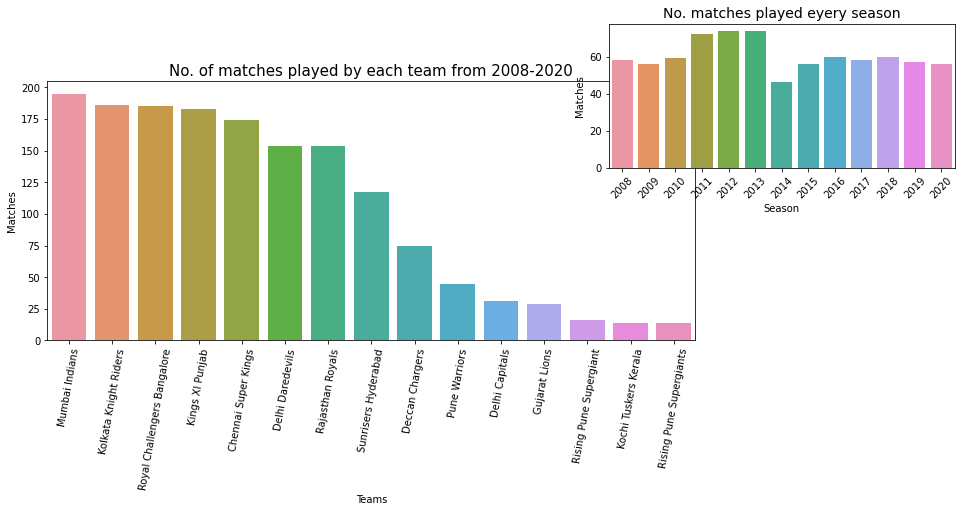

In [98]:
fig=plt.figure()
axes1=fig.add_axes([0.1,0.2,1.5,0.9])
axes1=sns.barplot(x='value',y='id',data=ptemp_df)
plt.xlabel('Teams')
plt.ylabel('Matches')
plt.title('No. of matches played by each team from 2008-2020', fontsize=15)
plt.xticks(rotation=80)
axes2=fig.add_axes([1.4,0.8,0.8,0.5])
axes2=sns.countplot(x='season',data=matches_raw)
plt.xlabel('Season')
plt.ylabel('Matches')
plt.title("No. matches played eyery season", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Total matches won by every team from 2008-2020

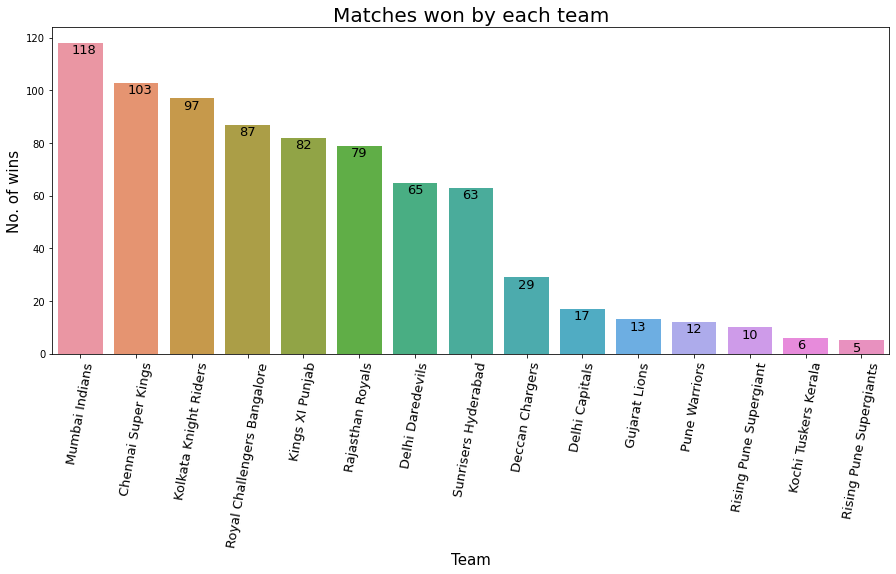

In [158]:
win_df=pd.DataFrame(matches_raw['winner'].value_counts())
win_df['name']=win_df.index
plt.figure(figsize=(15,6))
sns.barplot(x='name', y='winner', data=win_df)
count=0
for i in win_df['winner']:
    plt.text(count-0.15,i-4,str(i),size=13,color='black')
    count+=1
plt.xlabel('Team', fontsize=15)
plt.ylabel('No. of wins', fontsize=15)
plt.title('Matches won by each team', fontsize=20)
plt.xticks(rotation=80, fontsize=13)
plt.show()

# Titles won by every team

In [101]:
matches_raw.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,type,method,umpire1,umpire2,season,month
0,335982,Bangalore,18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,pre_qualifier,normal,Asad Rauf,RE Koertzen,2008,4
1,335983,Chandigarh,19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,pre_qualifier,normal,MR Benson,SL Shastri,2008,4
2,335984,Delhi,19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,pre_qualifier,normal,Aleem Dar,GA Pratapkumar,2008,4


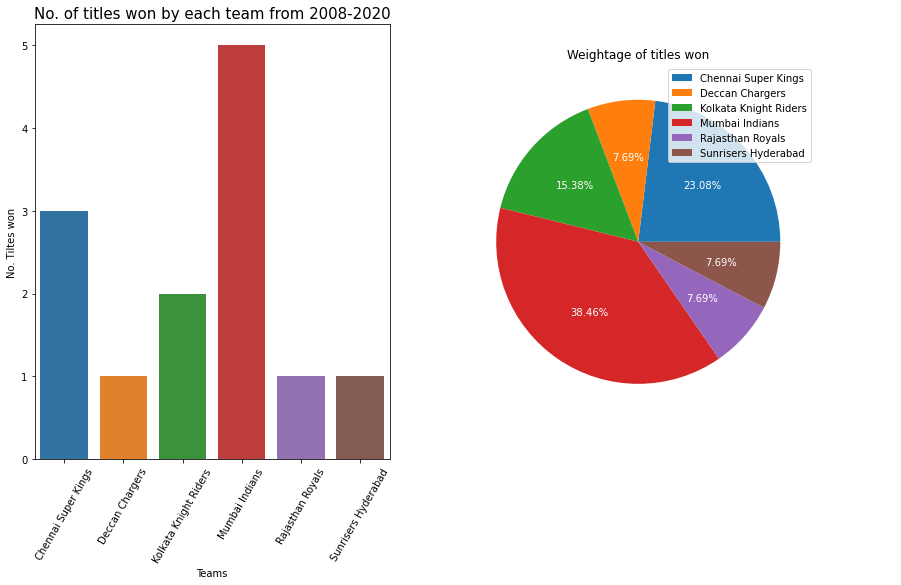

In [159]:
a=matches_raw[(matches_raw['type']=='final')]
vip= a.groupby(["winner"])["id"].count().reset_index()
plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
sns.barplot(x='winner',y='id',data=vip)
plt.xlabel('Teams')
plt.ylabel('No. Tiltes won')
plt.title('No. of titles won by each team from 2008-2020', fontsize=15)
plt.xticks(rotation=60)
plt.subplot(1,2,2)
plt.pie(vip["id"],
        labels=vip["winner"].values,autopct='%.2f%%',
        textprops={'color': 'w'})
plt.legend()
plt.title('Weightage of titles won')
plt.show()

# Match venues

In [104]:
matches_raw.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,type,method,umpire1,umpire2,season,month
0,335982,Bangalore,18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,pre_qualifier,normal,Asad Rauf,RE Koertzen,2008,4
1,335983,Chandigarh,19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,pre_qualifier,normal,MR Benson,SL Shastri,2008,4


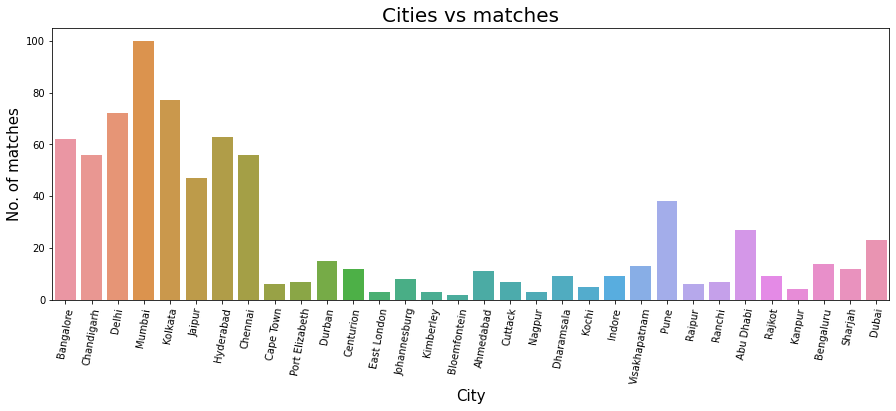

In [105]:
plt.figure(figsize=(15,5))
sns.countplot(x='city', data=matches_raw)
plt.xlabel('City',fontsize=15)
plt.ylabel('No. of matches',fontsize=15)
plt.title('Cities vs matches',fontsize=20)
plt.xticks(rotation=80)
plt.show()

# Top 5 Stadiums to host IPL

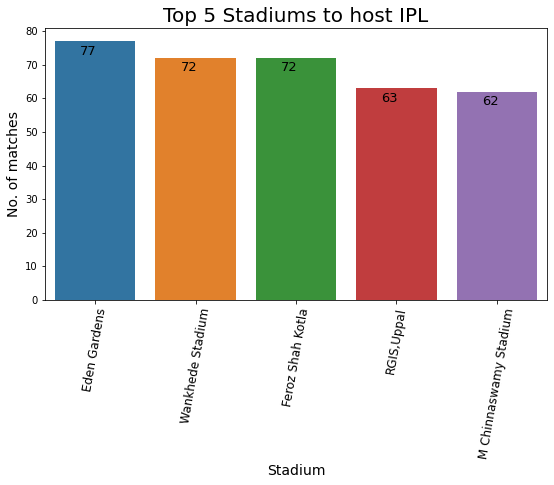

In [136]:
top_venues=matches_raw.groupby(["venue"])["id"].count().sort_values(ascending=False).reset_index().head(5)
top_venues['venue'] = top_venues['venue'].replace('Rajiv Gandhi International Stadium, Uppal' ,'RGIS,Uppal')
plt.figure(figsize=(9,5))
sns.barplot(x='venue',y='id',data=top_venues)
count=0
for i in top_venues['id']:
    plt.text(count-0.15,i-4,str(i),size=13,color='black')
    count+=1
plt.xlabel('Stadium', fontsize=14)
plt.ylabel('No. of matches', fontsize=14)
plt.title('Top 5 Stadiums to host IPL', fontsize=20)
plt.xticks(rotation=80, fontsize=12)
plt.show()

# Venue

In [107]:
keys2=list(pd.unique(matches_raw['team1']))
dict_home={'Royal Challengers Bangalore':'Bangalore',
          'Kings XI Punjab':'Chandigarh',
          'Delhi Daredevils':'Delhi',
          'Mumbai Indians':'Mumbai','Kolkata Knight Riders':'Kolkata',
       'Rajasthan Royals':'Jaipur', 'Deccan Chargers':'Hyderabad', 'Chennai Super Kings':'Chennai',
       'Kochi Tuskers Kerala':'Kochi', 'Pune Warriors':'Pune', 'Sunrisers Hyderabad':'Hyderabad',
       'Gujarat Lions':'Rajkot', 'Rising Pune Supergiants':'Pune',
       'Rising Pune Supergiant':'Pune', 'Delhi Capitals':'Delhi'}
#dict_home[(nnv_df.iloc[0,8])]

In [108]:
matches_raw.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,type,method,umpire1,umpire2,season,month
0,335982,Bangalore,18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,pre_qualifier,normal,Asad Rauf,RE Koertzen,2008,4
1,335983,Chandigarh,19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,pre_qualifier,normal,MR Benson,SL Shastri,2008,4
2,335984,Delhi,19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,pre_qualifier,normal,Aleem Dar,GA Pratapkumar,2008,4


In [109]:
nnv_df= matches_raw[(matches_raw['neutral_venue']==0)]
nnv_df['tem_venue']='null'
nnv_df.sample(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,type,method,umpire1,umpire2,season,month,tem_venue
459,829707,Chennai,9,A Nehra,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,Chennai Super Kings,runs,1.0,pre_qualifier,normal,RK Illingworth,VA Kulkarni,2015,4,null
812,1237177,Dubai,5,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,qualifier_1,normal,CB Gaffaney,Nitin Menon,2020,11,null


In [110]:
nnv_df.shape

(724, 20)

In [111]:
for i in range(724):
    if ((nnv_df.iloc[i,1]==dict_home[(nnv_df.iloc[i,6])])|(nnv_df.iloc[i,1]==dict_home[(nnv_df.iloc[i,7])])):
        if (nnv_df.iloc[i,1]==dict_home[(nnv_df.iloc[i,10])]):
            nnv_df.iloc[i,19]='home_win'
        else:
            nnv_df.iloc[i,19]='home_loss'
        
nnv_df.sample()                                           

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,type,method,umpire1,umpire2,season,month,tem_venue
388,598064,Chandigarh,6,DA Miller,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,pre_qualifier,normal,VA Kulkarni,NJ Llong,2013,5,home_win


In [112]:
pd.unique(nnv_df['tem_venue'])

array(['home_loss', 'home_win', 'null'], dtype=object)

In [113]:
nnv_df1= nnv_df[((nnv_df['tem_venue']=='home_win')|(nnv_df['tem_venue']=='home_loss'))]
nnv_df1.shape

(541, 20)

In [114]:
temp_x=nnv_df1.groupby(['winner', 'tem_venue'])['tem_venue'].count().unstack()
temp_x['total']=temp_x['home_loss'] + temp_x['home_win']

temp_y=temp_x.sort_values(by=['total'], ascending=False).head(7)
temp_y['home_win_probability']=((temp_y['home_win'])/(temp_y['total'])*100).round(1)
temp_y

tem_venue,home_loss,home_win,total,home_win_probability
winner,,,,
Mumbai Indians,37.0,52.0,89.0,58.4
Kolkata Knight Riders,29.0,45.0,74.0,60.8
Chennai Super Kings,28.0,40.0,68.0,58.8
Royal Challengers Bangalore,29.0,28.0,57.0,49.1
Kings XI Punjab,26.0,30.0,56.0,53.6
Rajasthan Royals,18.0,32.0,50.0,64.0
Delhi Daredevils,18.0,27.0,45.0,60.0


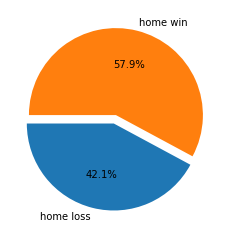

In [115]:
val=[((temp_y['home_loss'].sum())/(temp_y['total'].sum())*100),((temp_y['home_win'].sum())/(temp_y['total'].sum())*100)]
lab=['home loss', 'home win']
plt.pie(val, labels=lab, autopct='%0.1f%%',
       explode=[0.1,0], startangle=180)
plt.show()

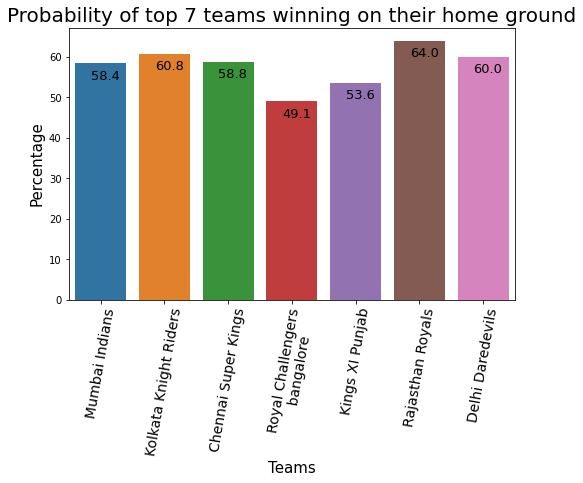

In [116]:
dh=data=temp_y['home_win_probability'].reset_index()
dh.iloc[3,0]='Royal Challengers\n bangalore'
plt.figure(figsize=(8,5))
sns.barplot(x='winner', y='home_win_probability', data=dh)
count=0
for i in dh['home_win_probability']:
    plt.text(count-0.15,i-4,str(i),size=13,color='black')
    count+=1
plt.xlabel('Teams',  fontsize=15)
plt.ylabel('Percentage',  fontsize=15)
plt.title('Probability of top 7 teams winning on their home ground', fontsize=20)
plt.xticks(rotation=80, fontsize=14)
plt.show()


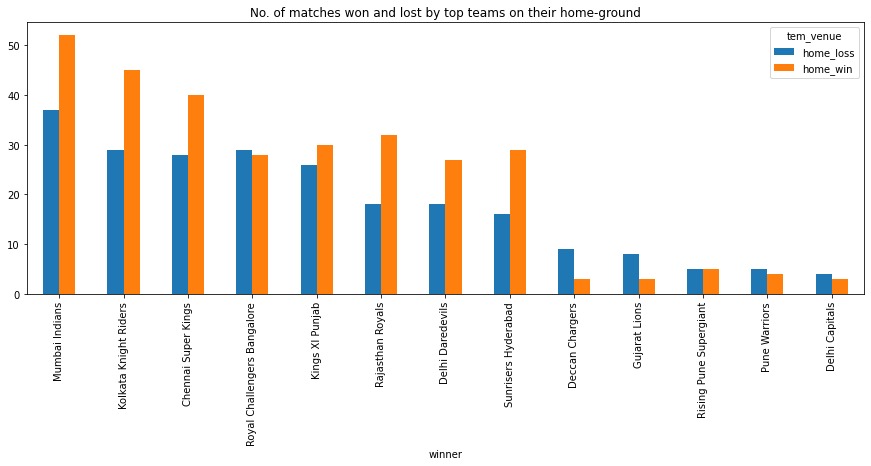

In [137]:
temp_p=temp_x.sort_values(by=['total'], ascending=False).reset_index().head(13)
figsize=(30, 5)
temp_p.plot(x="winner", y=["home_loss", "home_win"],
            kind="bar", figsize=(15, 5),
           title='No. of matches won and lost by top teams on their home-ground')
plt.show()

# Toss

In [118]:
matches_raw.sample(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,type,method,umpire1,umpire2,season,month
704,1175364,Chandigarh,30,MA Agarwal,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,field,Kings XI Punjab,wickets,8.0,pre_qualifier,normal,VA Kulkarni,CB Gaffaney,2019,3
231,501255,Bangalore,14,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,pre_qualifier,D/L,RE Koertzen,RB Tiffin,2011,5
629,1082644,Kolkata,13,AT Rayudu,Eden Gardens,0,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,field,Mumbai Indians,runs,9.0,pre_qualifier,normal,A Nand Kishore,S Ravi,2017,5


In [119]:
pd.unique(matches_raw['toss_decision'])

array(['field', 'bat'], dtype=object)

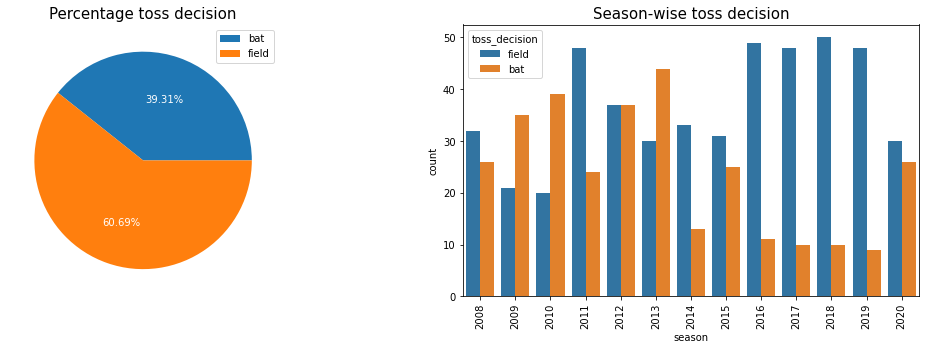

In [120]:
temp_toss=matches_raw.groupby(['toss_decision'])['id'].count().reset_index()
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.pie(temp_toss["id"],
        labels=temp_toss["toss_decision"].values,autopct='%.2f%%',
        textprops={'color': 'w'})
plt.legend()
plt.title('Percentage toss decision',fontsize=15)
plt.subplot(1,2,2)
sns.countplot(x='season', hue='toss_decision', data=matches_raw)
plt.xticks(rotation='vertical')
plt.title('Season-wise toss decision', fontsize=15)
plt.show()

In [122]:
matches_raw.shape

(786, 19)

In [123]:
j=0
for i in range(786):
    if (matches_raw.iloc[i,8]==matches_raw.iloc[i,10]):
        j=j+1
print(j)

408


In [124]:
mer= pd.DataFrame(np.random.rand(786,1))
raw_trial=matches_raw
raw_trial['trial']=mer
raw_trial

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,type,method,umpire1,umpire2,season,month,trial
0,335982,Bangalore,18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,pre_qualifier,normal,Asad Rauf,RE Koertzen,2008,4,0.996852
1,335983,Chandigarh,19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,pre_qualifier,normal,MR Benson,SL Shastri,2008,4,0.795035
2,335984,Delhi,19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,pre_qualifier,normal,Aleem Dar,GA Pratapkumar,2008,4,0.460276
3,335985,Mumbai,20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,pre_qualifier,normal,SJ Davis,DJ Harper,2008,4,0.866631
4,335986,Kolkata,20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,pre_qualifier,normal,BF Bowden,K Hariharan,2008,4,0.951230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,1216546,Dubai,20,S Dhawan,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Kings XI Punjab,wickets,5.0,pre_qualifier,normal,C Shamshuddin,RK Illingworth,2020,10,NaN
812,1237177,Dubai,5,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,qualifier_1,normal,CB Gaffaney,Nitin Menon,2020,11,NaN
813,1237178,Abu Dhabi,6,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,eliminator,normal,PR Reiffel,S Ravi,2020,11,NaN
814,1237180,Abu Dhabi,8,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,qualifier_2,normal,PR Reiffel,S Ravi,2020,11,NaN


In [125]:
for i in range(786):
    if (raw_trial.iloc[i,8]==raw_trial.iloc[i,10]):
        if (raw_trial.iloc[i,9]=='field'):
            raw_trial.iloc[i,19]='ff_w'
        elif (raw_trial.iloc[i,9]=='bat'):
            raw_trial.iloc[i,19]='fb_w'
    else:
        if (raw_trial.iloc[i,9]=='field'):
            raw_trial.iloc[i,19]='ff_l'
        elif (raw_trial.iloc[i,9]=='bat'):
            raw_trial.iloc[i,19]='fb_l'


raw_trial.head()
            

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,type,method,umpire1,umpire2,season,month,trial
0,335982,Bangalore,18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,pre_qualifier,normal,Asad Rauf,RE Koertzen,2008,4,ff_l
1,335983,Chandigarh,19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,pre_qualifier,normal,MR Benson,SL Shastri,2008,4,fb_w
2,335984,Delhi,19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,pre_qualifier,normal,Aleem Dar,GA Pratapkumar,2008,4,fb_l
3,335985,Mumbai,20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,pre_qualifier,normal,SJ Davis,DJ Harper,2008,4,fb_l
4,335986,Kolkata,20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,pre_qualifier,normal,BF Bowden,K Hariharan,2008,4,fb_l


In [126]:
pd.unique(raw_trial['trial'])

array(['ff_l', 'fb_w', 'fb_l', 'ff_w'], dtype=object)

In [127]:
f=raw_trial.groupby(['trial'])['id'].count().reset_index()
f['id']

0    167
1    142
2    211
3    266
Name: id, dtype: int64

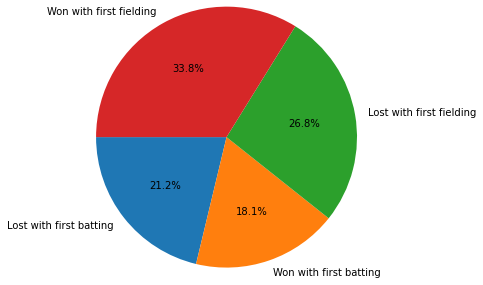

In [128]:
val=[167,142,211,266]
lables=['Lost with first batting', 'Won with first batting','Lost with first fielding', 'Won with first fielding']
plt.axis("equal")
plt.pie(val, labels=lables,radius=1.5,autopct='%0.1f%%',
       startangle=180)
plt.show()

In [129]:
j=0
x=0
for i in range(786):
    if (raw_trial.iloc[i,9]=='field'):
        if (raw_trial.iloc[i,8]==raw_trial.iloc[i,10]):
            j=j+1
    elif (raw_trial.iloc[i,9]=='bat'):
        if (raw_trial.iloc[i,8]==raw_trial.iloc[i,10]):
            x=x+1
print('No. of teams that chose to field first and won the match= ',j)
print('No. of teams that chose to bat first and won the match= ',x )

No. of teams that chose to field first and won the match=  266
No. of teams that chose to bat first and won the match=  142


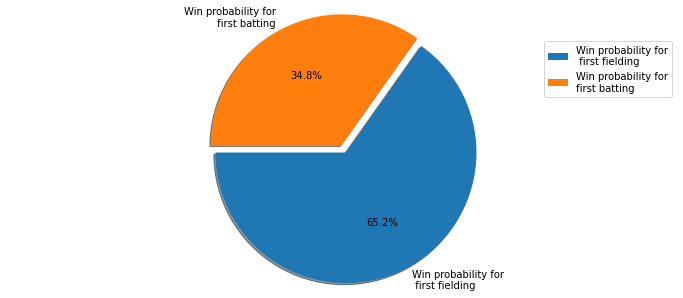

In [130]:
val=[266,142]
lab= ['Win probability for\n first fielding','Win probability for\nfirst batting']
plt.figure(figsize=(12,4))
plt.axis("equal")
plt.pie(val, labels=lab, radius=1.5, autopct='%0.1f%%',
        explode=[0.1,0], shadow=True, startangle=180)
plt.legend()
plt.show()

In [131]:
matches_raw.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,type,method,umpire1,umpire2,season,month,trial
0,335982,Bangalore,18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,pre_qualifier,normal,Asad Rauf,RE Koertzen,2008,4,ff_l
1,335983,Chandigarh,19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,pre_qualifier,normal,MR Benson,SL Shastri,2008,4,fb_w
2,335984,Delhi,19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,pre_qualifier,normal,Aleem Dar,GA Pratapkumar,2008,4,fb_l
3,335985,Mumbai,20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,pre_qualifier,normal,SJ Davis,DJ Harper,2008,4,fb_l
4,335986,Kolkata,20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,pre_qualifier,normal,BF Bowden,K Hariharan,2008,4,fb_l


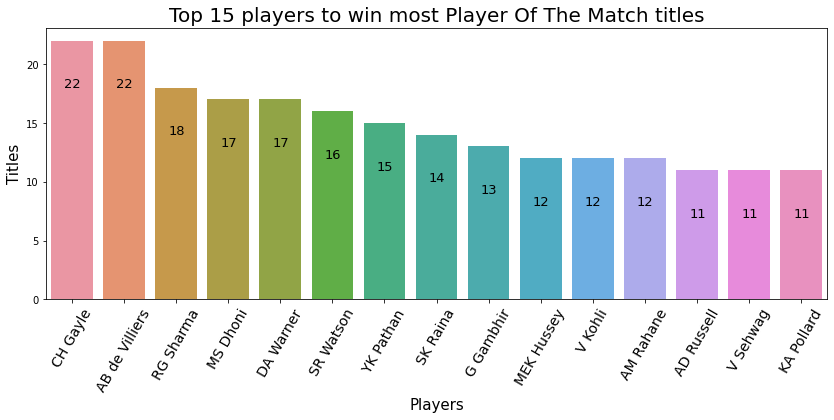

In [139]:
ply_df=matches_raw.groupby(['player_of_match'])['id'].count().reset_index().sort_values(by=['id'],
                                                                                 ascending=False).head(15)
plt.figure(figsize=(14,5))
sns.barplot(x='player_of_match',y='id',data= ply_df)
count=0
for i in ply_df['id']:
    plt.text(count-0.15,i-4,str(i),size=13,color='black')
    count+=1
plt.xlabel('Players',  fontsize=15)
plt.ylabel('Titles',  fontsize=15)
plt.title('Top 15 players to win most Player Of The Match titles', fontsize=20)
plt.xticks(rotation=60, fontsize=14)
plt.show()

In [138]:
matches_raw.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,type,method,umpire1,umpire2,season,month,trial
0,335982,Bangalore,18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,pre_qualifier,normal,Asad Rauf,RE Koertzen,2008,4,ff_l
1,335983,Chandigarh,19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,pre_qualifier,normal,MR Benson,SL Shastri,2008,4,fb_w
2,335984,Delhi,19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,pre_qualifier,normal,Aleem Dar,GA Pratapkumar,2008,4,fb_l
3,335985,Mumbai,20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,pre_qualifier,normal,SJ Davis,DJ Harper,2008,4,fb_l
4,335986,Kolkata,20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,pre_qualifier,normal,BF Bowden,K Hariharan,2008,4,fb_l


# Umpires

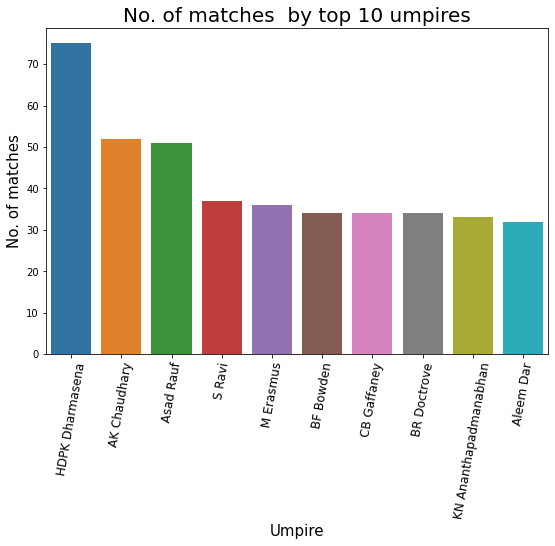

In [133]:
bn=matches_raw.groupby(['umpire1'])['id'].count().reset_index()#.sort_values[by=['id'], ascending=False]
bn=bn.sort_values(by=['id'], ascending=False).head(10)
plt.figure(figsize=(9,6))
sns.barplot(x='umpire1',y='id' ,data=bn)
plt.xlabel('Umpire',fontsize=15)
plt.ylabel('No. of matches', fontsize=15)
plt.title('No. of matches  by top 10 umpires', fontsize=20)
plt.xticks(rotation=80, fontsize=12)
plt.show()